In [1]:
import json
import pandas as pd
from IPython.display import Markdown, display
import ast
from PIL import Image

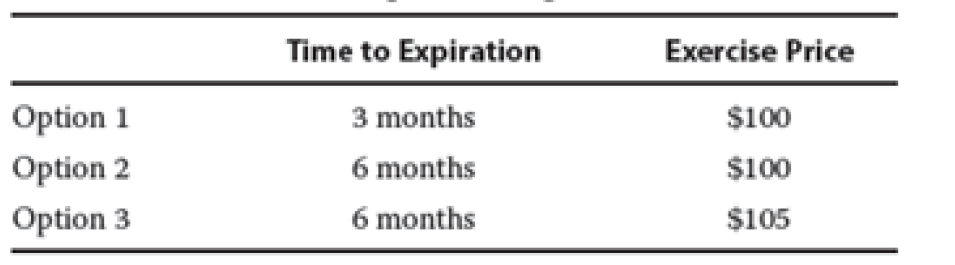

In [2]:
Image.open("/Volumes/Jennie/Reasoning/FinReasoning/dataset/images/level1_yan_sheng_images/43u.png")

In [54]:


new_file_path = '/Volumes/Jennie/Reasoning/FinReasoning/dataset/data_v3.csv'
df1 = pd.read_csv(new_file_path)
df1['ID'] = df1['ID'].astype(int)
df1['Question Number'] = df1['Question Number'].astype(int)
df1['Share Context'] = df1['Share Context'].fillna('')
df1['Image'] = df1['Image'].fillna('')
df1['Share Image'] = df1['Share Image'].fillna('')
df1['shared_description']=df1['shared_description'].fillna('')
df1['description']=df1['description'].fillna('')
df1['待处理']=df1['待处理'].fillna('')
df1['Train']=df1['Train'].fillna('')
# Function to safely evaluate the string to a dictionary
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return "error"


# Apply the function to the 'Options' column
df1['Options'] = df1['Options'].apply(safe_literal_eval)

# Function to safely evaluate the string to a list
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val


# Apply the function to the 'Share Image' column
df1['Share Image'] = df1['Share Image'].apply(safe_literal_eval)
data_dict = df1.to_dict(orient='records')

import os

# Check if the file exists
if os.path.exists( '/Volumes/Jennie/Reasoning/FinReasoning/dataset/data_v3.json'):
    # Delete the file
    os.remove( '/Volumes/Jennie/Reasoning/FinReasoning/dataset/data_v3.json')
    print("File deleted successfully.")
else:
    print("File does not exist.")
# Write dictionary to JSON file with UTF-8 encoding
with open( '/Volumes/Jennie/Reasoning/FinReasoning/dataset/data_v3.json', 'w', encoding='utf-8') as json_file:
    json.dump(data_dict, json_file, ensure_ascii=False, indent=4)

<unknown>:1: SyntaxWarning: invalid escape sequence '\$'


File deleted successfully.


In [52]:
file_path = '/Volumes/Jennie/Reasoning/FinReasoning/dataset/data_v3.json'
df = pd.read_json(file_path)
df=df[df['ID']==3408]

In [53]:



for entry in df.iterrows():
    print("ID:", entry[1]['ID'])
    print('Question Number:', entry[1]['Question Number'])
    print('Question:')
    display(Markdown(entry[1]['Question Text']))
    print('Options:')
    display(Markdown(str(entry[1]['Options'])))
    if entry[1]["Image"]!='':
        print('Image:', entry[1]['Image'])
        display(Image(entry[1]['Image']))
    # print('Options:', entry[1]['Options'])
    # a=entry[1]['Human Caption'].replace('\[','$$').replace('\]','$$').replace('\(','$').replace('\)','$')
    print('Expalnation:')
    display(Markdown(entry[1]['Explanation']))
    print('-----------------------------------')

ID: 3408
Question Number: 45
Question:


Given the following information, what is Bank A’s net stable funding ratio?
1. High-quality liquid assets
2. Required amount of stable funding
3. Cash outflows over the next 30 days
4. Net cash outflows over the next 30 days
5. Available amount of stable funding
6. High-quality liquid assets in each major currency

Options:


{'A': '65%', 'B': '89%', 'C': '105%', 'D': '125%'}

Expalnation:


The longer-term funding ratio is equal to the available amount of stable funding
divided by the required amount of stable funding. Under Basel III, this ratio must exceed 100%.
Bank A’s net stable funding ratio = $210/$200 = 105%.

-----------------------------------
